# Chinese Text Sentiment Analysis Based on Deep Learning

#### ***Label:***

$$positive->label('美味')=1$$
$$negative->label('难吃')=0$$

#### ***Flowchart:***
<center><img width=500 src="https://i.imgur.com/Ln5oRY1.png"></center>

In [ ]:
pip install tensorflow==2.5.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 454.3 MB 17 kB/s 
     |████████████████████████████████| 4.0 MB 41.1 MB/s 
     |████████████████████████████████| 132 kB 69.5 MB/s 
     |████████████████████████████████| 14.8 MB 43.7 MB/s 
     |████████████████████████████████| 462 kB 58.7 MB/s 
     |████████████████████████████████| 1.2 MB 50.7 MB/s 
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-linux_x86_64.whl size=68722 sha256=aa01260d51f3103c0dece1e720c994d488904a18606231b31841e566fe0e8420
  Stored in directory: /root/.cache/pip/wheels/62/76/4c/aa25851149f3f6d9785f6c869387ad82b3fd37582fa8147ac6
Successfully built wrapt
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.1.1
    Uninstalling typing-extensions-4.1.1:
      Successfully uninstalled typing-extensions-4.1.1
  Attempting uninstall: numpy
    Found existing installation: n

In [ ]:
# pip install numpy==1.19.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install gensim==4.1.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 24.1 MB 4.7 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [ ]:
# import numpy
# numpy.__version__

'1.19.5'

In [ ]:
# import tensorflow
# tensorflow.__version__ 

'2.5.0'

In [ ]:
# import gensim 
# gensim.__version__ 

'4.1.2'

In [ ]:
# import matplotlib
# matplotlib.__version__ 

'3.2.2'

## Import

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import re
import jieba  # jieba: Chinese words segmentation module
from gensim.models import KeyedVectors  # gensim: load the pre-trained word vector
import warnings
import os
import random
warnings.filterwarnings("ignore")
import bz2  # unzip
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
from sklearn.model_selection import train_test_split  # Split training and test samples
# using tensorflow's keras interface
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, GRU, Embedding, LSTM, Bidirectional
# from tensorflow.keras.layers import Dense, GRU, Embedding, LSTM, Bidirectional
from tensorflow.python.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
# from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, ReduceLROnPlateau

## Load Pre-trained Word Vectors Model
###### In the word vector model, each word is an index, which corresponds to a vector of length 300. Since the LSTM neural network model does not directly process Chinese text, we need to first perform word separation operations and then convert the words into word vectors.

In [8]:
# Place the downloaded word vectors in the embeddings folder in the root directory and unzip
with open("embeddings/sgns.zhihu.bigram", 'wb') as new_file, open("embeddings/sgns.zhihu.bigram.bz2", 'rb') as file:
    decompressor = bz2.BZ2Decompressor()
    for data in iter(lambda : file.read(100 * 1024), b''):
        new_file.write(decompressor.decompress(data))

In [9]:
# Load pre-trained Chinese word separation embedding using gensim 
cn_model = KeyedVectors.load_word2vec_format('embeddings/sgns.zhihu.bigram', binary=False, unicode_errors="ignore")

In [10]:
# Input a Chinese word and output a vector of words of length 300
embedding_dim = cn_model['青岛'].shape[0]
print('The length of the word vector is {}'.format(embedding_dim))
cn_model['青岛']

The length of the word vector is 300


array([ 8.375510e-01,  4.208510e-01, -2.799180e-01,  5.622690e-01,
       -8.997970e-01,  5.272690e-01,  9.496400e-01,  4.563700e-02,
       -9.810400e-02, -2.630750e-01, -1.524345e+00,  7.652050e-01,
       -1.986810e-01, -6.065320e-01,  5.041090e-01, -4.938500e-01,
        5.872340e-01, -1.234050e-01, -4.244760e-01,  1.889090e-01,
        7.961510e-01,  6.705470e-01,  7.920700e-02,  5.041190e-01,
       -5.473530e-01, -6.844260e-01,  4.471700e-01, -2.957340e-01,
       -2.229900e-01,  1.689930e-01,  3.720270e-01, -1.595700e-01,
       -3.491800e-02,  2.385590e-01, -2.851160e-01, -3.496570e-01,
       -2.146670e-01,  1.279030e-01,  1.851230e-01, -8.933700e-02,
       -3.738830e-01, -3.261810e-01,  8.310600e-02, -2.764490e-01,
        1.571830e-01, -6.430000e-03, -4.535830e-01,  3.596070e-01,
       -4.212470e-01,  4.759860e-01,  1.874830e-01, -1.392510e-01,
       -6.330000e-04,  1.503450e-01, -2.699750e-01, -3.896300e-02,
       -9.544230e-01,  1.075360e-01, -5.690130e-01,  5.670360e

In [11]:
# Calculate the cosine similarity of two words 
cn_model.similarity('英国', '伦敦')

0.55973804

In [12]:
# Input a Chinese word and find the 10 most similar words to it 
cn_model.most_similar(positive=['人民币'], topn=10)

[('美元', 0.7081582546234131),
 ('港币', 0.6911839842796326),
 ('日元', 0.6810632348060608),
 ('汇率', 0.679571270942688),
 ('欧元', 0.6542581915855408),
 ('欧元和', 0.6420362591743469),
 ('英镑', 0.6394895911216736),
 ('贬值', 0.636674165725708),
 ('韩元', 0.6353235840797424),
 ('卢布', 0.6327826976776123)]

In [13]:
# Enter a set of Chinese words and find the word that is not in the same category
test_words = '英国 德国 法国 中国 帅哥'
test_words_result = cn_model.doesnt_match(test_words.split())
print('In '+ '['+test_words+']' +':\nThe word that is not in the same category is: %s' %test_words_result)

In [英国 德国 法国 中国 帅哥]:
The word that is not in the same category is: 帅哥


**datasets**  
The datasets are placed in two separate .txt files: 
* <I>positive_samples.txt</I> (2000 Chinese positive reviews, label=1）
* <I>negative_samples.txt</I> (2000 Chinese negative reviews, label=0）

## Data Preprocessing 

In [14]:
train_texts_orig = []  # Store all reviews, one string per case
train_target = []  # Store all labels. The first 2,000 reviews are positive, the last 2,000 are negative. 
with open("datasets/positive_samples.txt", "r", encoding="utf-8") as f:
    lines = f.readlines()
    for line in lines:
        dic = eval(line)
        train_texts_orig.append(dic["text"])
        train_target.append(dic["label"])

with open("datasets/negative_samples.txt", "r", encoding="utf-8") as f:
    lines = f.readlines()
    for line in lines:
        dic = eval(line)
        train_texts_orig.append(dic["text"])
        train_target.append(dic["label"])

In [15]:
print(len(train_texts_orig))
print(len(train_target))

4000
4000


**remove punctuation, jieba word segmentation and tokenize**  
* First we remove the punctuation from each sample. 
* Then using jieba word segmentation, which returns a generator -> cut. 
* However, the generator cannot be tokenized directly, so we also need to convert it to a list -> cut_list. 
* Next, Index it. 
* Finally, the text evaluated in each case becomes a segment of indexed numbers corresponding to the words in the pre-trained word vectors model.

In [16]:
train_tokens = []
for text in train_texts_orig:
    # Remove punctuation
    text = re.sub("[\s+\.\!\/_,$%^*(+\"\']+|[+——！，。？、~@#￥%……&*（）]+", "",text)
    # jieba word segmentation
    cut = jieba.cut(text)  # jieba's output is a generator -> cut
    cut_list = [ i for i in cut ]  # Convert the generator to list -> cut_list 
    for i, word in enumerate(cut_list):
        try:
            cut_list[i] = cn_model.key_to_index[word]  # Convert words to index
            # cut_list[i] = cn_model.vocab[word].index
        except KeyError:
            cut_list[i] = 0  # If the word is not in the dictionary, output 0
    train_tokens.append(cut_list)  # train_tokens is a long list containing 4000 small lists, corresponding to each evaluation

Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 1.048 seconds.
Prefix dict has been built successfully.


**normalising index length**  
Because each review is of a different length, it would be a waste of computing resources to simply take the longest one and fill the others to the same length, so we take a compromise length.

In [17]:
# Get lengths of all tokens
num_tokens = [ len(tokens) for tokens in train_tokens ]
num_tokens = np.array(num_tokens)

In [18]:
# The average length of tokens
np.mean(num_tokens)

71.42575

In [19]:
# The longest tokens length
np.max(num_tokens)

1540

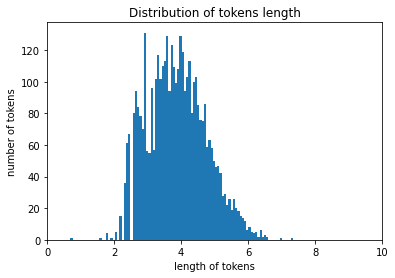

In [20]:
# Display the distribution of tokens length 
plt.hist(np.log(num_tokens), bins = 100)
plt.xlim((0,10))
plt.ylabel('number of tokens')
plt.xlabel('length of tokens')
plt.title('Distribution of tokens length')
plt.show()

In [21]:
# Take the mean of tokens + standard deviation of tokens *2. The distribution of tokens lengths is approximated as a normal distribution
max_tokens = np.mean(num_tokens) + 2 * np.std(num_tokens)
max_tokens = int(max_tokens)
max_tokens

236

In [22]:
# When tokens are taken to be 236 in length, about 95% of the sample is covered. 
# (Under-length tokens will be padding and over-length tokens will be trimmed later)
np.sum( num_tokens < max_tokens ) / len(num_tokens)

0.9565

**reverse tokenize**  
Define a function to convert the index into readable text, which is important for debugging.

In [23]:
# Convert tokens to text
def reverse_tokens(tokens):
    text = ''
    for i in tokens:
        if i != 0:
            # text = text + cn_model.index2word[i]
            text = text + cn_model.index_to_key[i]
        else:
            text = text + ' '
    return text

In [24]:
# After tokenize and revert to text, the punctuation is gone
reverse = reverse_tokens(train_tokens[0])
reverse

'早餐太差无论去多少人那边也不加食品的酒店应该重视一下这个问题了房间本身很好'

In [25]:
# original text
train_texts_orig[0]

'早餐太差，无论去多少人，那边也不加食品的。酒店应该重视一下这个问题了。\n\n房间本身很好。'

## Create the Embedding Matrix 

**create the embedding matrix**  
* Now, we need to create an embedding matrix. According to keras, we need to prepare a dimension of $(numwords, embedddingdim)$ of the matrix, where numwords represents the number of words we use, and emdeddingdim is 300 in the pre-trained word vector model we are using now, with each word represented by a vector of length 300.
* Note that we use only the first 50k most frequently used words. There are 2.6 million words in this pre-trained word vector model, and it would be a waste of computational resources to use them all for the classification problem.



In [26]:
embedding_dim

300

In [27]:
num_words = 50000  # Use only the first 50,000 words
embedding_matrix = np.zeros((num_words, embedding_dim))  # Initialise embedding_matrix
for i in range(num_words):
    embedding_matrix[i,:] = cn_model[cn_model.index_to_key[i]]
    # embedding_matrix[i,:] = cn_model[cn_model.index2word[i]]
embedding_matrix = embedding_matrix.astype('float32')  # embedding_matrix is a matrix of [num_words, embedding_dim]. 
print('Dimension of embedding_matrix:', embedding_matrix.shape)  # Dimension of embedding_matrix

Dimension of embedding_matrix: (50000, 300)


**padding and truncating**  
After we convert the text into indexes, the length of each string of indexes is not equal, so in order to facilitate the training of the model, we need to normalise the length of the indexes. Above, we have chosen 236 samples, which can cover 95% of the length of the training samples.  
Next, we do padding and truncating. We generally use the 'pre' method, which will fill in the front of the text indexes with 0. Because, according to some research materials in practice, if you fill in the text indexes after 0, it will have some adverse effects on the model.

In [28]:
# Padding and truncating. The input train_tokens is a list, and the returned train_pad is a numpy array. 
train_pad = pad_sequences(train_tokens, maxlen=max_tokens,
                            padding='pre', truncating='pre')

In [29]:
# Words beyond the 50,000 word vector are replaced by 0
train_pad[ train_pad>=num_words ] = 0

In [30]:
# Fill in the front of the text index with 0. Text at the end
train_pad[33]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [31]:
# create target labels, 1 for the first 2000 samples, 0 for the next 2000
train_target = np.array(train_target)

In [32]:
# 90% for training, 10% for test
X_train, X_test, y_train, y_test = train_test_split(train_pad, train_target, test_size=0.1, random_state=12)

## Model Building 

Now we build the LSTM model using keras. The first layer of the model is the embedding layer, and only after we have transformed the token index into a word vector matrix can the text be processed by the neural network. Keras provides an embedding interface to avoid tedious sparse matrix operations.   
The matrix entered in the Embedding layer is: $$(batchsize, maxtokens)$$
The output matrix is: $$(batchsize, maxtokens, embeddingdim)$$

In [33]:
model = Sequential()

In [34]:
# The first layer of the model is embedding
model.add(Embedding(num_words,
                    embedding_dim,
                    weights=[embedding_matrix],
                    input_length=max_tokens,
                    trainable=False))

In [35]:
# 有兴趣的同学可以调整一下模型参数, 看看会不会有更好的结果
model.add(Bidirectional(LSTM(units=64, return_sequences=True)))
model.add(LSTM(units=32, return_sequences=True))
model.add(LSTM(units=16, return_sequences=False)) 

We tried several neural network structures, and because the training samples were relatively small, the training process did not take long to complete.
* GRU: The test samples could achieve 87% accuracy if GRU was used. However, when I tested my own text content, I found that the output of the last layer of the GRU activation function was all around 0.5, indicating that the model's judgement was not very clear, and after testing, I found that the model sometimes missed the judgement for negative sentences. We would expect the output to be close to 0 for negative samples and close to 1 for positive samples rather than hovering between 0.5.
* Single LSTM, stacked LSTM and BiLSTM: We tested both LSTM and BiLSTM and found that BiLSTM performed best, with LSTM performing slightly better than GRU, probably because BiLSTM has better memory for longer sentence structures.
* After Embedding the first layer we used BiLSTM to return sequences, then the second layer of 16 units of LSTM did not return sequences but only the final result, and finally a fully linked layer with a sigmoid activation function to output the result.

In [ ]:
# GRU code
# model.add(GRU(units=32, return_sequences=True))
# model.add(GRU(units=16, return_sequences=True))
# model.add(GRU(units=4, return_sequences=False))

In [36]:
model.add(Dense(1, activation='sigmoid'))

In [37]:
optimizer = Adam(lr=1e-3)

In [38]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 236, 300)          15000000  
_________________________________________________________________
bidirectional (Bidirectional (None, 236, 128)          186880    
_________________________________________________________________
lstm_1 (LSTM)                (None, 236, 32)           20608     
_________________________________________________________________
lstm_2 (LSTM)                (None, 16)                3136      
_________________________________________________________________
dense (Dense)                (None, 1)                 17        
Total params: 15,210,641
Trainable params: 210,641
Non-trainable params: 15,000,000
_________________________________________________________________


## Model Training 

In [40]:
# Create a storage point for the weights
path_checkpoint = 'sentiment_checkpoint.keras'
checkpoint = ModelCheckpoint(filepath=path_checkpoint, monitor='val_loss',
                                      verbose=1, save_weights_only=True,
                                      save_best_only=True)

In [41]:
# Try to load a trained model
try:
    model.load_weights(path_checkpoint)
except Exception as e:
    print(e)

Unable to open file (unable to open file: name = 'sentiment_checkpoint.keras', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)


In [42]:
# Define early stopping. If the validation loss does not improve within 5 epochs then stop training
earlystopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

In [43]:
# Automatic learning rate reduction
lr_reduction = ReduceLROnPlateau(monitor='val_loss',
                                       factor=0.1, min_lr=1e-8, patience=0,
                                       verbose=1)

In [44]:
# Define the callback function
callbacks = [
    earlystopping, 
    checkpoint,
    lr_reduction
]

模型训练的过程中，val_loss的耐心在五次，如果连续五次epoch的val_loss都没有下降，就降低学习率以尝试改善loss值。如果容忍范围内的5次epoch降低学习率都不能改善结果，就执行early stopping终止训练. 

In [ ]:
# # Start training 
# model.fit(X_train, y_train,
#           validation_split=0.1, 
#           epochs=20,
#           batch_size=128,
#           callbacks=callbacks)

In [45]:
history_1 = model.fit(X_train, y_train,
          validation_split=0.1, 
          epochs=20,
          batch_size=128,
          callbacks=callbacks)

Epoch 1/20
26/26 [==============================] - 74s 2s/step - loss: 0.6046 - accuracy: 0.6676 - val_loss: 0.5501 - val_accuracy: 0.7222

Epoch 00001: val_loss improved from inf to 0.55014, saving model to sentiment_checkpoint.keras
Epoch 2/20
26/26 [==============================] - 63s 2s/step - loss: 0.4331 - accuracy: 0.8173 - val_loss: 0.4085 - val_accuracy: 0.8139

Epoch 00002: val_loss improved from 0.55014 to 0.40853, saving model to sentiment_checkpoint.keras
Epoch 3/20
26/26 [==============================] - 62s 2s/step - loss: 0.3694 - accuracy: 0.8410 - val_loss: 0.3560 - val_accuracy: 0.8556

Epoch 00003: val_loss improved from 0.40853 to 0.35600, saving model to sentiment_checkpoint.keras
Epoch 4/20
26/26 [==============================] - 63s 2s/step - loss: 0.3786 - accuracy: 0.8429 - val_loss: 0.3226 - val_accuracy: 0.8917

Epoch 00004: val_loss improved from 0.35600 to 0.32264, saving model to sentiment_checkpoint.keras
Epoch 5/20
26/26 [==========================

使用keras保存历史准确率acc与loss值： 

https://blog.csdn.net/bluehatihati/article/details/100314601  
  

https://blog.csdn.net/weixin_36208314/article/details/113085566?utm_medium=distribute.pc_relevant.none-task-blog-2~default~baidujs_baidulandingword~default-1-113085566-blog-100314601.pc_relevant_multi_platform_whitelistv2&spm=1001.2101.3001.4242.2&utm_relevant_index=4  

把前面的check point中的两个True改为False，试试结果。（不一定是必须的，因为两个True的情况下的结果仍然可以正常全部保存）



In [53]:
A = history_1.history['val_loss']
B = history_1.history['val_accuracy']

In [ ]:
# A1 = [0.5, 0.3, 0.6, 0.7]

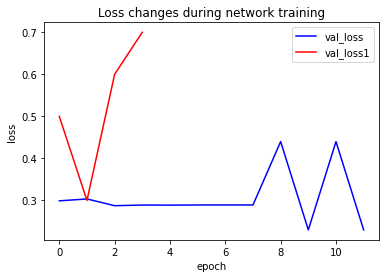

In [ ]:
plt.figure()
# plt.plot(A, label='val_loss', color='b')
# plt.plot(A1, label='val_loss1', color='r')
plt.plot(B, label='val_accuracy', color='r')
plt.xlabel('epoch')
plt.ylabel('val_accuracy')
plt.legend()
plt.title('Loss changes during network training')
plt.show()

## Model Test

Firstly, we use model.evaluate( ) 输入test data(X_test)和test label(y_test)，输出损失和精确度.



In [46]:
result = model.evaluate(X_test, y_test)
print('Accuracy:{0:.2%}'.format(result[1]))

13/13 [==============================] - 2s 187ms/step - loss: 0.3118 - accuracy: 0.8750
Accuracy:87.50%


We then use model.predict( ) function to 输入test data(X_test)， 输出预测结果。并将预测结果和test label(y_test)进行对比，输出对应的confusion matrix heatmap。

In [ ]:
'''Then, load the saved model, and evaluate it on the test data'''
# evaluate on the test data
test_pred = model.predict(X_test) 
# print(test_pred)
# print(test_pred.shape)

In [50]:
test_pred = model.predict(X_test) 

In [56]:
# confusion matrix (sn.heatmap) 待删
A = []
for i in test_pred:
  if i >= 0.5:
    A.append(1)
  else:
    A.append(0)
# cm = confusion_matrix(y_test,A,labels=[0,1])  # get confusion matrix
# df_cm = pd.DataFrame(cm)  # convert the confusion matrix to dataframe
# ax = sn.heatmap(df_cm,annot=True,fmt='.20g',cmap="Greens")  # annot = True -> Show numbers
# ax.set_title('confusion matrix')
# ax.set_xlabel('predict')
# ax.set_ylabel('true')

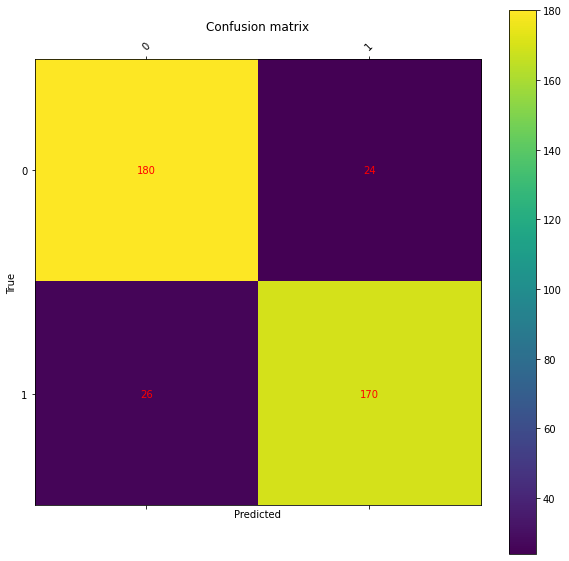

In [57]:
# confusion matrix
def confusion_matrix_heatmap(y_test, preds):
    """Function to plot a confusion matrix"""
    labels = list(set(y_test))   # get the labels in the y_test
    # print(labels)
    # cm = confusion_matrix(y_test, preds, labels)
    cm = confusion_matrix(y_test,A,labels=[0,1])  # get confusion matrix
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm)
    plt.title('Confusion matrix')
    fig.colorbar(cax)
    ax.set_xticks(np.arange(len(labels)))
    ax.set_yticks(np.arange(len(labels)))
    ax.set_xticklabels( labels, rotation=45)
    ax.set_yticklabels( labels)

    for i in range(len(cm)):
        for j in range(len(cm)):
            text = ax.text(j, i, cm[i, j],
                           ha="center", va="center", color="red")

    plt.xlabel('Predicted')
    plt.ylabel('True')
    #fig.tight_layout()
    # # fix for mpl bug that cuts off top/bottom of seaborn viz:
    # b, t = plt.ylim() # discover the values for bottom and top
    # b += 0.5 # Add 0.5 to the bottom
    # t -= 0.5 # Subtract 0.5 from the top
    # plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.savefig('hi')
    plt.show() # ta-da!


confusion_matrix_heatmap(y_test, A)

Next, We define a new prediction function to predict the label of the custom input text. The results show that the model is accurate for negative sentences and simple logical structures.

In [58]:
def predict_sentiment(text):
    print(text, end=" ")
    # remove punctuation
    text = re.sub("[\s+\.\!\/_,$%^*(+\"\']+|[+——！，。？、~@#￥%……&*（）]+", "",text)
    # word segmentation
    cut = jieba.cut(text)
    cut_list = [ i for i in cut ]
    # tokenize
    for i, word in enumerate(cut_list):
        try:
            # cut_list[i] = cn_model.vocab[word].index
            cut_list[i] = cn_model.key_to_index[word]
            if cut_list[i] >= 50000:
                cut_list[i] = 0
        except KeyError:
            cut_list[i] = 0
    # padding
    tokens_pad = pad_sequences([cut_list], maxlen=max_tokens,
                           padding='pre', truncating='pre')
    # predict 
    result = model.predict(x=tokens_pad)
    coef = result[0][0]
    if coef >= 0.5:
        # print('-> prediction: positive','-> output=%.2f'%coef)
        print('-> output=%.2f'%coef, '-> positive')
    else:
        print('-> output=%.2f'%coef, '-> negative')

In [59]:
test_list = [
    '酒店设施不是新的，服务态度很不好',
    '酒店卫生条件非常不好',
    '床铺非常舒适',
    '房间很凉，不给开暖气',
    '房间很凉爽，空调冷气很足',
    '酒店环境不好，住宿体验很不好',
    '房间隔音不到位' ,
    '晚上回来发现没有打扫卫生',
    '因为过节所以要我临时加钱，比团购的价格贵'
]
for text in test_list:
    predict_sentiment(text)

酒店设施不是新的，服务态度很不好 -> output=0.33 -> negative
酒店卫生条件非常不好 -> output=0.31 -> negative
床铺非常舒适 -> output=0.74 -> positive
房间很凉，不给开暖气 -> output=0.32 -> negative
房间很凉爽，空调冷气很足 -> output=0.76 -> positive
酒店环境不好，住宿体验很不好 -> output=0.14 -> negative
房间隔音不到位 -> output=0.33 -> negative
晚上回来发现没有打扫卫生 -> output=0.40 -> negative
因为过节所以要我临时加钱，比团购的价格贵 -> output=0.09 -> negative


## Error Analysis 

Through our analysis, we find that the meaning of the misclassified text is mostly ambiguous, and even humans can not easily determine the polarity. For example, this sentence with index 305 seems to have no element of satisfaction at all, but this example rating is marked as positive in the training sample, and the prediction of a negative rating made by our model seems reasonable.

首先让已经训练好的模型在400条测试集上进行实验，得到相应的测试集预测标签y_pred,然后将其与测试集的真实标签y_test进行对比。并统计出所有分类错误的false positive和false negative样本索引。并在最后针对FP和FN分别进行详细的错误分析。 

false positive samples: 预测你是负向，但实际不是负向(pred=0, label=1)  
false negative samples: 预测你不是负向，但实际是负向(pred=1, label=0)

In [60]:
y_pred = model.predict(X_test)
y_pred = y_pred.T[0]
y_pred = [1 if p>= 0.5 else 0 for p in y_pred]
y_pred = np.array(y_pred)

In [61]:
y_actual = np.array(y_test)

In [62]:
F_P = []
F_N = []

for i in range(400):
  if y_pred[i]==0 and y_actual[i]==1:
    F_P.append(i)
  if y_pred[i]==1 and y_actual[i]==0:
    F_N.append(i)

print('The indexes of false positive samples are as follows:')
print(F_P)
print(" ")
print('The indexes of false negative samples are as follows:')
print(F_N)
print(" ")
print('The total number of misclassified samples is:')
print(len(F_P+F_N))

The indexes of false positive samples are as follows:
[1, 30, 73, 80, 81, 101, 123, 127, 130, 189, 207, 211, 223, 228, 238, 246, 253, 267, 286, 297, 305, 335, 349, 365, 373, 391]
 
The indexes of false negative samples are as follows:
[5, 14, 15, 21, 42, 59, 72, 87, 128, 148, 182, 218, 244, 257, 258, 275, 283, 285, 302, 311, 342, 347, 352, 368]
 
The total number of misclassified samples is:
50


**Output False Positive Samples (prediction=0, label=1)**

In [65]:
# Randomly select five false positive samples from the F_P list. 
FP_index = random.sample(F_P, 5)

In [66]:
# False Positive Sample 01: 
print('False Positive Sample 01:')
idx = FP_index[0]
reverse_tokens(X_test[idx])

False Positive Sample 01:


'                                                                                                                                                                                                         入住的时候 在哪里?房间里的花盆特别象90年代初期的田园花盆极为难看更可怕的是入住的时候门口不管客人照常 范围清洁'

In [67]:
# False Positive Sample 02: 
print('False Positive Sample 02:')
idx = FP_index[1]
reverse_tokens(X_test[idx])

False Positive Sample 02:


'                                                                                                                                                                                         酒店 房间硬件设施还是不错的但是餐厅实在太差上菜非常慢价格 质量差86元2 的香煎银鳕鱼居然是臭的叫来餐厅经理品尝了半天不吭声最后竟然然颠倒黑白地说不臭实在不能容忍'

In [68]:
# False Positive Sample 03: 
print('False Positive Sample 03:')
idx = FP_index[2]
reverse_tokens(X_test[idx])

False Positive Sample 03:


'                                                                                                                                                                                                       房间够大因为带了孩子定的是  了不要35 的时候其他楼层的没房间了前台主动安排大床房免费加了 床态度 的'

In [69]:
# False Positive Sample 04: 
print('False Positive Sample 04:')
idx = FP_index[3]
reverse_tokens(X_test[idx])

False Positive Sample 04:


'                                                                                                                                                                                               好当时看到有人评价说什么 多我还心有余悸呢结果好的不得了吗哪里有电话我们自己人打电话  仔细核对身份呢而且房间也好服务也非常的好真的是徐州 的酒店'

In [70]:
# False Positive Sample 05: 
print('False Positive Sample 05:')
idx = FP_index[4]
reverse_tokens(X_test[idx])

False Positive Sample 05:


'                                                                                                                                                                                                        没有想象的离西湖近年轻人走走也得10-15分钟因为窗不是面对西湖的所以景基本看不到西湖要把头 勉强看到商业街远处的尽头是湖面'

****Output False Negative Samples (prediction=1, label=0)****

In [71]:
# Randomly select five false negative samples from the F_N list. 
FN_index = random.sample(F_N, 5)

In [72]:
# False Positive Sample 01: 
print('False Negative Sample 01:')
idx = FN_index[0]
reverse_tokens(X_test[idx])

False Negative Sample 01:


'                                                                                                                                                           在胡同里不过还算好找房价便宜 简单但还比较干净离  步行都可以出 就有小吃店如果 火车站近可以选这补充点评2008年4月21日：之前给的点评错误因为看错宾馆名字 和平宾馆这家酒店给我 虽然地段好就靠 但退房速度慢房间隔音不好有味道看上去不干净下次不会去了'

In [73]:
# False Positive Sample 02: 
print('False Negative Sample 02:')
idx = FN_index[1]
reverse_tokens(X_test[idx])

False Negative Sample 02:


'                                                                                                                                                                                                                               而去我的评价：地段差服务 硬件还可以'

In [74]:
# False Positive Sample 03: 
print('False Negative Sample 03:')
idx = FN_index[2]
reverse_tokens(X_test[idx])

False Negative Sample 03:


'                                                                                                                                                                                                                            感觉一般就是各方面都一般在 这种地方住住还是可以的'

In [75]:
# False Positive Sample 04: 
print('False Negative Sample 04:')
idx = FN_index[3]
reverse_tokens(X_test[idx])

False Negative Sample 04:


'                                                                                                                                                                              地理位置还不错到哪里都比较方便但是服务不象是 集团管理的比较差下午睡了 并洗了一个澡本来想让酒店再来打扫一下所以打开了请打扫的服务灯可是到晚上回酒店发现打扫得服务灯被关掉了而房间还是没有打扫过'

In [76]:
# False Positive Sample 05: 
print('False Negative Sample 05:')
idx = FN_index[4]
reverse_tokens(X_test[idx])

False Negative Sample 05:


'                                                                                                                                                                                          特价房相当的吵临近高价桥晚上 拉不过在背面的房间倒还不错价格也很有吸引力就是房间很旧服务员态度一般而且还很忙入住和退房都等了很久差不多10-30分钟才能搞定'

这里提出一点儿改进措施，即情感细粒度分析。原先只有两类正向和负向，我们可以更细致地进行区分，比如加上‘中立’这个情感态度。只是建议，因为数据集的label只有0和1两类，所以如果要进行更细腻的情感分析，可能需要修改新的数据集，这是一个不小的工作量。后期可以考虑如何在不修改原始数据集的情况下进行此改进。 

可以现在github上找一下是否有更高质量的数据集。